In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Cleaning up the data**  

In [3]:
def outputCheck(df):
    if(df.columns.size >0):
        print("■■■■■ Pass■■■■■")           
    else:
        print("Error the dataframe is empty or null")

In [4]:
df =pd.read_csv("new_fire_weather_data.csv")

outputCheck(df)

■■■■■ Pass■■■■■


In [5]:
#df.to_csv("fire_weather_data.csv",index=False)
nand=[]
for i in range(len(df)-1,-1,-1):
    for ele in df.iloc[i]:
        if str(ele)== "nan":
            df=df.drop(df.index[i])
            break


In [6]:
#dont need after first run
df.to_csv("new_fire_weather_data")

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## **Creating a linear model**

In [8]:
outputCheck(df)
df =df[df.incident_acres_burned>100]
df =df[ df.incident_acres_burned <200000]
df

■■■■■ Pass■■■■■


,Unnamed: 0,incident_name,incident_date_created,incident_administrative_unit,incident_county,incident_location,incident_acres_burned,incident_cooperating_agencies,incident_longitude,incident_latitude,...,Max Temperature,Avg Temperature,Min Temperature,Dew Point,Precipitation,Snowdepth,Wind,Gust Wind,Sea Level Pressure,elevation
2,4,Gold Fire,2013-04-30 12:59:00,CAL FIRE Madera-Mariposa-Merced Unit,Madera,Between Road 210 and Road 200 near Fine Gold C...,274,CAL FIRE Madera-Mariposa-Merced Unit,-119.635004,37.116295,...,92.00,77.98,63.29,40.10,0.00,0.0,6.08,0.60,29.51,484.616089
4,7,Yellow Fire,2013-05-01 02:01:00,CAL FIRE Sonoma-Lake-Napa Unit,Sonoma,Hwy 128 & Yellow Jacket Ranch Rd in Knights Va...,125,CAL FIRE Sonoma-Lake-Napa Unit,-122.655616,38.638828,...,88.71,65.77,47.00,39.54,0.00,0.0,5.01,2.21,29.72,255.670990
5,8,Summit Fire,2013-05-01 12:38:00,CAL FIRE/Riverside County Fire,Riverside,Mias Canyon and Bluff Road in Banning,3166,CAL FIRE/Riverside County Fire,-116.941311,34.288877,...,87.14,75.65,55.29,35.28,0.00,0.0,5.59,1.54,28.67,2411.368408
6,9,Tres Pinos Fire,2013-05-03 11:42:00,CAL FIRE San Benito-Monterey,San Benito,"Highway 25 and Horizon Rd, Community of Tres",354,CAL FIRE San Benito-Monterey,-120.937494,37.160346,...,85.14,69.29,55.71,41.68,0.00,0.0,6.71,1.42,29.84,24.833916
7,10,306 Fire,2013-05-01 19:00:00,CAL FIRE Tehama-Glenn Unit,Glenn,2 miles south of the community of Elk Creek,217,CAL FIRE Tehama-Glenn Unit,-122.560862,39.514139,...,87.00,73.86,60.86,27.52,0.00,0.0,11.47,9.79,29.41,526.162109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1646,Creek Fire,2020-08-18 17:58:52,CAL FIRE Mendocino Unit,Mendocino,"Covelo, Highway 162 and Short Creek Rd",820,Cooperating Agencies: California Department of...,-123.211101,39.817437,...,98.14,83.60,59.29,51.48,0.01,0.0,4.58,0.00,29.11,418.601074
1260,1648,Moc Fire,2020-08-20 14:26:08,CAL FIRE Tuolumne-Calaveras Unit and Central C...,Tuolumne,"Hwy 49 and Hwy 120, Moccasin",2857,CAL FIRE Tuolumne-Calaveras Unit,-120.312565,37.813779,...,102.57,87.41,73.14,55.08,0.00,0.0,8.25,1.08,29.80,293.668060
1261,1651,Sheep Fire,2020-08-22 22:02:57,"Unified Command: Plumas National Forest, Lasse...",Plumas,"Gold Run Road, Southwest of Susanville in Plum...",29570,Plumas National Forest,-120.757000,40.274000,...,98.14,83.60,59.29,51.48,0.01,0.0,4.58,0.00,29.11,1614.909912
1263,1659,Oak Fire,2020-09-07 13:26:45,CAL FIRE MEU Mendocino Unit,Mendocino,West of Highway 101--Big John Road & Skyview R...,1100,"CAL FIRE Mendocino Unit , Cooperating Agencies...",-123.396500,39.493500,...,87.29,67.07,55.14,51.73,0.00,0.0,2.73,0.51,29.72,588.767822


In [9]:
size=99
state =45
train_fire_x,test_fire_x,train_fire_target,test_fire_target=train_test_split(df.drop(columns=["Unnamed: 0","incident_latitude","incident_longitude","incident_date_created",'incident_acres_burned',"incident_name","incident_administrative_unit","incident_county","incident_location","incident_cooperating_agencies","incident_date_extinguished","incident_dateonly_extinguished","incident_dateonly_created","Precipitation","Snowdepth","Sea Level Pressure"]), df['incident_acres_burned'], test_size=1-size/100,random_state=state)
outputCheck(train_fire_x)
outputCheck(test_fire_x)
train_fire_x


■■■■■ Pass■■■■■
■■■■■ Pass■■■■■


,Max Temperature,Avg Temperature,Min Temperature,Dew Point,Wind,Gust Wind,elevation
120,63.43,53.14,43.29,34.82,5.47,4.89,501.834259
787,64.14,50.03,37.71,20.45,6.32,2.83,1927.409912
199,91.43,73.14,56.14,50.83,8.53,0.83,185.543777
190,81.43,66.88,55.29,34.81,6.71,3.73,145.514313
1252,99.43,81.20,65.00,55.04,7.76,0.22,43.234276
...,...,...,...,...,...,...,...
1217,90.57,78.26,64.71,44.16,6.41,1.19,495.161713
289,81.71,68.33,54.86,47.64,9.58,2.96,37.840279
1257,97.86,82.90,69.71,58.79,6.26,0.41,448.618225
1158,95.86,79.70,62.00,45.86,4.41,0.55,1143.959717


In [10]:
regression_line =linear_model.LinearRegression()
regression_line.fit(train_fire_x,train_fire_target)

predictions =regression_line.predict(test_fire_x)

In [14]:
tft=[y for y in test_fire_target]
print(tft)
print(predictions)
predictions.coef_



[300, 225, 163, 8838, 135, 217, 8073]
[1379.29470127 3484.05114855 6628.22018274 6041.05567518 3672.04850887
 5890.16243619 5049.32089024]


AttributeError: 'numpy.ndarray' object has no attribute 'coef_'

In [12]:
print(mean_squared_error(tft,predictions))
print(r2_score(tft,predictions))

16463768.649823086
-0.1822321301673242


In [13]:
import matplotlib.pyplot as plt
#i need to create comparisons between all the vars


## **Comparing the variables and the Outputs**

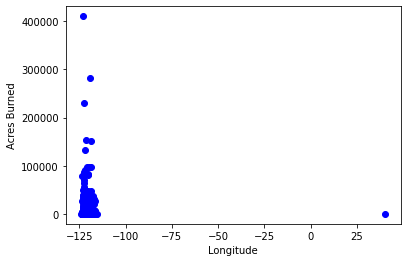

In [214]:
#most longitude and lats are very similar and not enough data to have accurate data for area in the specific coords
arr=df.incident_longitude
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Longitude")
plt.ylabel("Acres Burned")


plt.show()

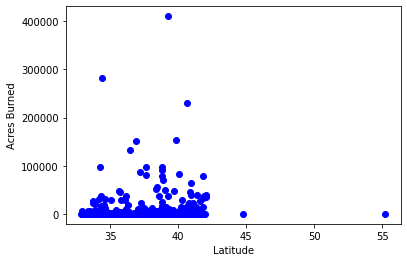

In [215]:
arr=df.incident_latitude
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Latitude")
plt.ylabel("Acres Burned")


plt.show()

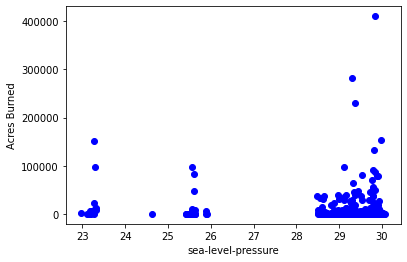

In [216]:
arr=df["Sea Level Pressure"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("sea-level-pressure")
plt.ylabel("Acres Burned")


plt.show()

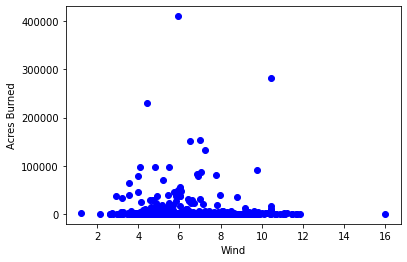

In [217]:
arr=df["Wind"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Wind")
plt.ylabel("Acres Burned")


plt.show()

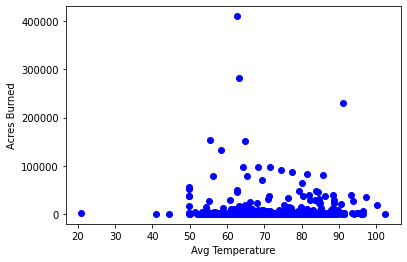

In [218]:
arr=df["Avg Temperature"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Avg Temperature")
plt.ylabel("Acres Burned")


plt.show()

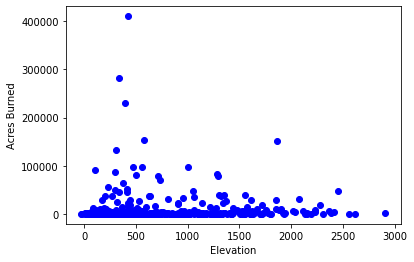

In [219]:
arr=df.elevation
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Elevation")
plt.ylabel("Acres Burned")


plt.show()
#fires usually do not grow to large sizes at higher elevations
#most fires occured below 1500 meters
#more info on how topography and altitude and day cycle affect fires is below
# https://www.fs.fed.us/rm/pubs_exp_for/priest_river/exp_for_priest_river_1942_hayes02.pdf


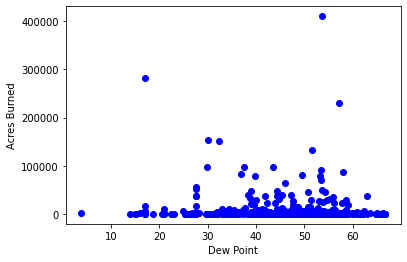

In [220]:
arr=df["Dew Point"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Dew Point")
plt.ylabel("Acres Burned")


plt.show()
#Dew Point is the atmospheric pressure that it takes for water drops to condense and form
#dew point has an effect on the rate of fires because lowers can cause lower moistures in
#fuels at the bottom of a forrest
# https://www.dfes.wa.gov.au/waemergencyandriskmanagement/obrm/Documents/Relative-Humidity-and-Dew-Point-Information-Sheet.pdf
#this does not exactly agree with my results it seems that between 60-30 most fires occur
#the temperature also must be affected by air temperature and below 30ish its too cold for fires

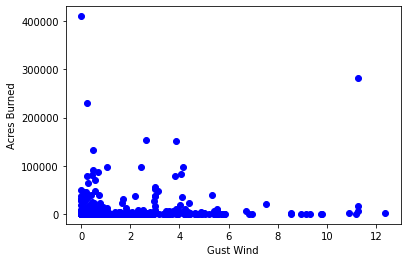

In [221]:
arr=df["Gust Wind"]
ans=df.incident_acres_burned
#plotting it
plt.scatter(arr,ans,color='Blue')
#lables
plt.xlabel("Gust Wind")
plt.ylabel("Acres Burned")


plt.show()
#there is a consistent outlier of the thomas fire which occured in the winter time, but 
#gree to be one of the largest fires in  cali becasue of other codnitions
#this fire has low dew point  and high winds
# more info can be found below on the wiki  
#  https://en.wikipedia.org/wiki/Thomas_Fire

In [154]:
#graph of average fire size
totalAcres=0
average_fire=[]
dates=[]
print(df.sort_values(by="incident_date_created").size)
for i in range(df.sort_values(by="incident_date_created").size):
    if(i ==1265):
        break

    totalAcres+=df.sort_values(by="incident_date_created").iloc[i].incident_acres_burned
    average_fire.append(totalAcres/i)
    dates.append(df.sort_values(by="incident_date_created").iloc[i].incident_dateonly_created)
average_fire[0].pop()
dates[0].pop()


29118


<ipython-input-154-787972b1c934>:11: RuntimeWarning: divide by zero encountered in longlong_scalars
  average_fire.append(totalAcres/i)


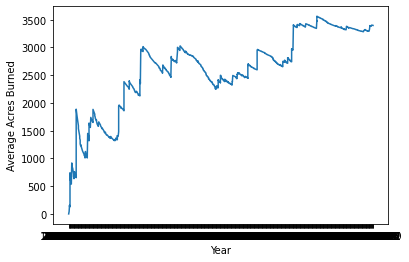

In [222]:
plt.plot(dates, average_fire)

plt.xlabel("Year")
plt.ylabel("Average Acres Burned")


plt.show()
#This a plot of the average fire size over the years which could mean that date is an important factor to fire size